In [ ]:
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation


In [ ]:
# Load training and testing data
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values

# Define features (X) and target (y)
features = ['LotArea', 'GrLivArea', 'OverallQual']  # Example features
target = 'SalePrice'  # The target column

# Handle missing values before splitting the data
# Impute missing values with the median of each column
imputer = SimpleImputer(strategy='median')
train_data[['LotFrontage', 'MasVnrArea']] = imputer.fit_transform(train_data[['LotFrontage', 'MasVnrArea']])

# Split the dataset into features and target
X = train_data[features]
y = train_data[target]

# Split the data into training and test sets (using train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


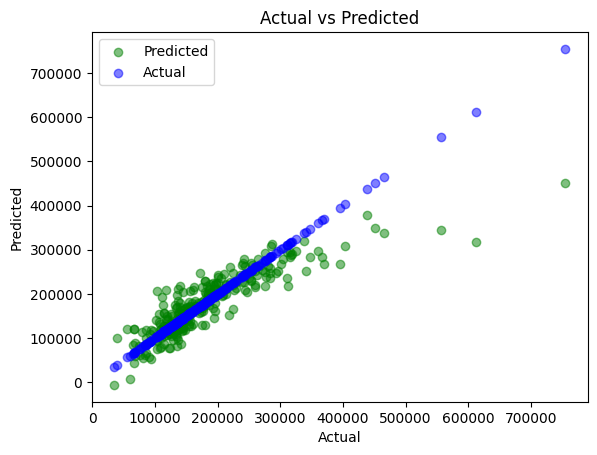

In [10]:

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values with custom colors
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')  # You could use a different marker or label here

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()

plt.show()
